# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 5 or 6 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt
#only if you have jupyterthemes
#from jupyterthemes import jtplot
#jtplot.style()

### Download Cifar10 dataset

In [5]:
torch.cuda.is_available()

False

In [6]:
DATA_PATH = '/your_path'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

100%|██████████| 170498071/170498071 [00:15<00:00, 11063016.46it/s]


Extracting /your_path/cifar-10-python.tar.gz to /your_path
Files already downloaded and verified
Files already downloaded and verified


In [7]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /your_path
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [8]:
train_loader.batch_size

64

In [9]:
for i, (x, y) in enumerate(train_loader):
    print(x, y)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
          [-6.8596e-01, -6.7008e-01, -6.2245e-01,  ..., -1.0194e+00,
           -9.2411e-01, -5.9070e-01],
          [-6.5420e-01, -6.3833e-01, -5.9070e-01,  ..., -5.7482e-01,
           -4.9544e-01, -4.3193e-01],
          ...,
          [-6.0657e-01,  7.4295e-01,  1.0446e+00,  ..., -1.0829e+00,
           -1.0670e+00, -1.0194e+00],
          [-4.6368e-01, -5.0885e-02, -3.2079e-01,  ..., -1.1146e+00,
           -1.0988e+00, -1.0511e+00],
          [-1.0035e+00, -9.5586e-01, -9.0823e-01,  ..., -1.1146e+00,
           -1.0988e+00, -1.0511e+00]],

         [[-1.0153e+00, -9.9911e-01, -9.3456e-01,  ..., -9.3456e-01,
           -9.3456e-01, -8.5387e-01],
          [-1.0637e+00, -9.9911e-01, -9.1842e-01,  ..., -1.3057e+00,
           -1.2412e+00, -9.1842e-01],
          [-1.0314e+00, -9.6684e-01, -8.8615e-01,  ..., -8.8615e-01,
           -8.2159e-01, -7.5704e-01],
          ...,
          [-9.3456e-01,  2.5966e-01,  4.2104e

### Using  GPUs

In [10]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cpu


### Mostrar imágenes

La imagen muestreada representa un: truck


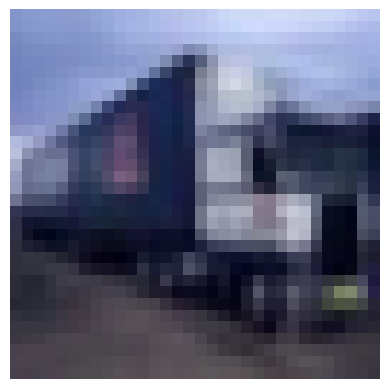

In [11]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


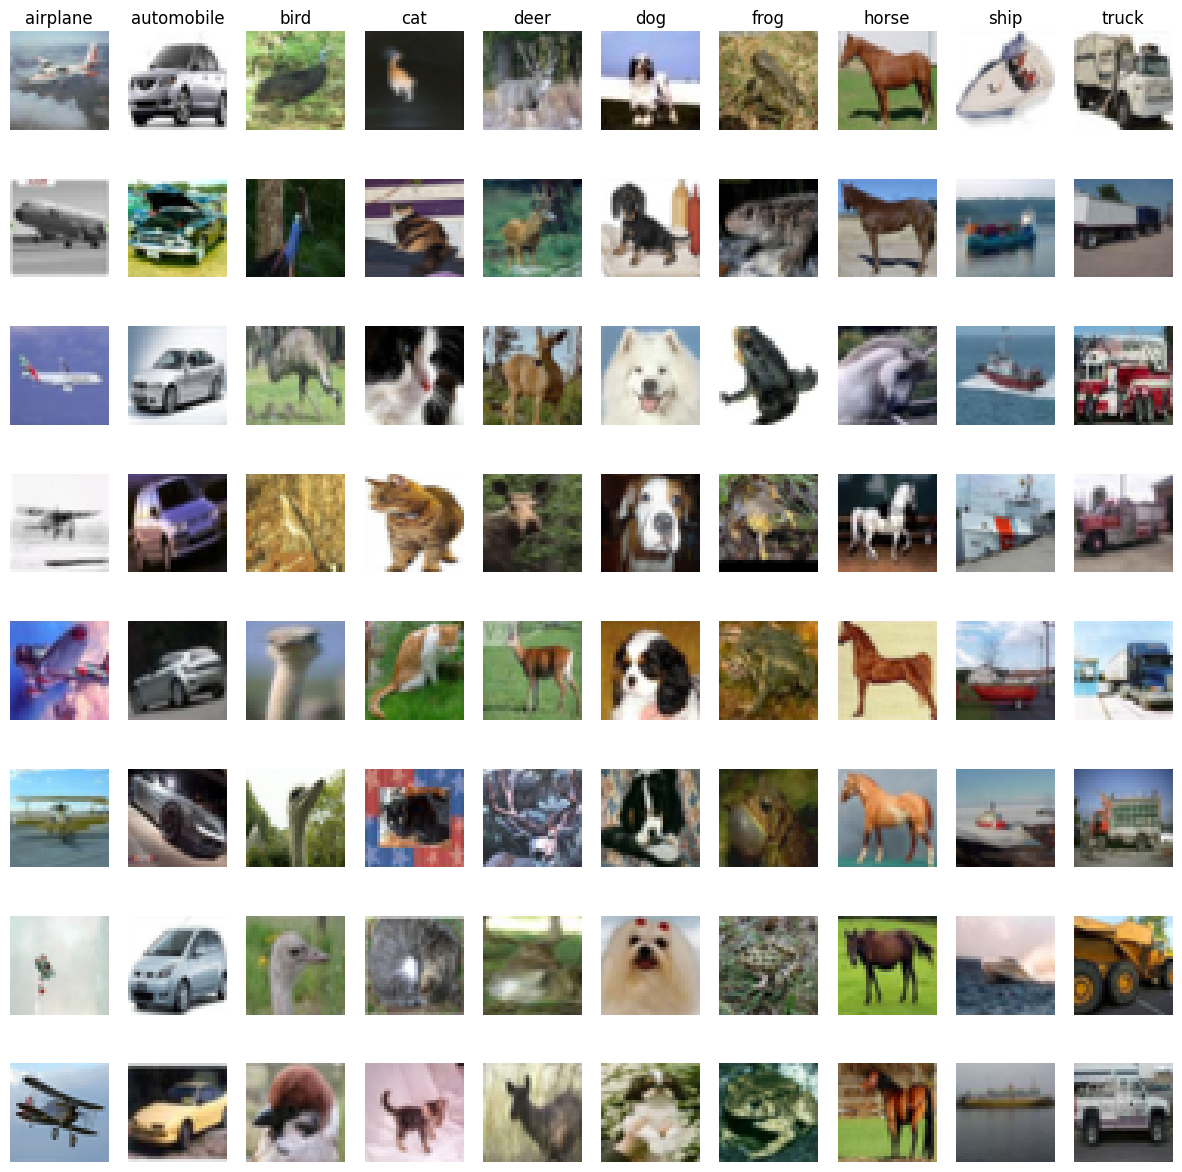

In [12]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()

### Calcular accuracy


In [18]:
#def accuracy(model, loader):
# To do: Code your accuracy function
#    pass

# Definir la arquitectura de la CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=64*8*8, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64*8*8)  # Flattening
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


### Loop de entrenamiento

In [19]:
#def train(model, optimiser, epochs=100):

    #To do: program your training loop as previously

#    pass

# Definir la función de entrenamiento
def train(model, optimizer, criterion, train_loader, val_loader, epochs=10):
    model = model.to(device)
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/i:.4f}, Accuracy: {100.*correct/total:.2f}%')

        # Evaluar el rendimiento en el conjunto de validación
        model.eval()
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
        print(f'Validation Accuracy: {100.*val_correct/val_total:.2f}%')


### Linear model

In [20]:
# To do: Use PyTorch to create a linear model to have an initial baseline model
# Definir la función de precisión
def accuracy(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    return 100. * correct / total


In [21]:
#train(model1, optimiser, epochs)

# Crear el modelo CNN
model = SimpleCNN()

# Definir el optimizador y la función de pérdida
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Entrenar el modelo
train(model, optimizer, criterion, train_loader, val_loader, epochs=10)

# Evaluar el rendimiento en el conjunto de prueba
test_accuracy = accuracy(model, test_loader)
print(f'Test Accuracy: {test_accuracy:.2f}%')


Epoch [1/10], Loss: 1.2350, Accuracy: 55.91%
Validation Accuracy: 65.78%
Epoch [2/10], Loss: 0.8485, Accuracy: 70.28%
Validation Accuracy: 70.38%
Epoch [3/10], Loss: 0.6469, Accuracy: 77.32%
Validation Accuracy: 71.84%
Epoch [4/10], Loss: 0.4607, Accuracy: 84.13%
Validation Accuracy: 73.04%
Epoch [5/10], Loss: 0.2940, Accuracy: 89.86%
Validation Accuracy: 72.76%
Epoch [6/10], Loss: 0.1713, Accuracy: 94.28%
Validation Accuracy: 73.18%
Epoch [7/10], Loss: 0.1093, Accuracy: 96.43%
Validation Accuracy: 71.82%
Epoch [8/10], Loss: 0.0810, Accuracy: 97.34%
Validation Accuracy: 73.28%
Epoch [9/10], Loss: 0.0709, Accuracy: 97.65%
Validation Accuracy: 71.68%
Epoch [10/10], Loss: 0.0721, Accuracy: 97.57%
Validation Accuracy: 72.98%
Test Accuracy: 72.60%


### Sequential CNN

In [ ]:
# To do: Use PyTorch to implement a CNN model, accuracy should be better than
#the linear model

In [ ]:
train(modelCNN1, optimiser, epochs)